In [ ]:
%load_ext Cython


In [ ]:
%%cython -a
cimport numpy as cnp
from libc.stdlib cimport malloc, free

cdef multiplicativeCongruentialMethod(unsigned long long int alpha, int M, unsigned long long int beta , int *randomNums, int noOfRandomNums):
    cdef int j = 1
    randomNums[0] = alpha
    while j < noOfRandomNums:
        randomNums[j] = (randomNums[j - 1] * beta) % M
        j = j + 1
    return [number for number in randomNums[:noOfRandomNums]]
        
cdef main():
    cdef unsigned long long int alpha = 82
    cdef int M = 11
    cdef unsigned long long int beta = 63
    cdef int noOfRandomNums = 10000
    cdef int  i = 0
    cdef int *randomNums = <int *> malloc(noOfRandomNums * sizeof(int))
    
    cdef cnp.ndarray[cnp.int_t, ndim=1] resultArray
    if not randomNums:
        raise MemoryError()

    try:
        resultArray = multiplicativeCongruentialMethod(alpha, M, beta, randomNums, noOfRandomNums)
        while i < noOfRandomNums:
            print(i, end = " ")
            i = i + 1
    finally:
        free(randomNums)



In [ ]:
%%cython

from cpython cimport array
import array
cdef array.array a = array.array('i', [1, 2, 3])
cdef int[:] ca = a

print(ca[0])

MIN :  8.111e-08
MAX :  0.99984089631
Intervals:  14
0.03518018101353982
0.03451556278976517
0.037503819006904845
0.035455982459485405
0.034846942800525915
0.03580034168643602
0.03530617496862073
0.03535280520479772
0.03603324798148965
0.03665984928602446
0.035088917369992007
0.0359659029167296
0.03721284312303738
0.03582511190465285
Hi =  23.161599999999993
delta R = [0.000419055683650818, 0.000918412212108366, 3.6194829329816436e-05, 0.00046531926880444274, 0.0017167770933507187, 7.12764898186391e-05, 0.0006214436458157335, 0.00022559016710305135, 0.0007054620131404787, 0.0003894517399356534, 0.0005263472437633809, 0.0005517778064002554, 0.0007751372242476018]
0.0030407111984631567 0.002150107508063172
Moment Verification = 1.103280133382582
Variance = 0.08306893316316147
Teoretical Dispersion 5.600279917e-07
Dispersion Verification = 0.3532754280936694
Dispersion 0.08306893316316132
Check 0.50318489541
{8.111e-08: 678, 0.07141728219571428: 730, 0.14283448328142856: 720, 0.2142516843

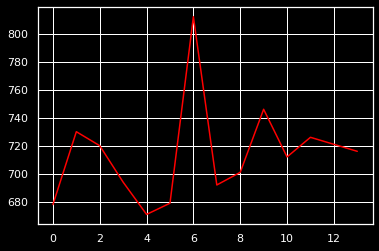

In [12]:
import statistics as st
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
def multicong(n): 
    q = 11
    b = 4141
    M = 10**q
    a0 = 8111
    bvv = [0]*n
    a = [0]*(n+1)
    a[0] = a0
    for i in range(1,n+1):
        a[i] = (b * a[i - 1]) % M
        bvv[i - 1] = a[i - 1] / M
    return bvv

def ver():
    V = np.int64(5*10**5)
    bvv = multicong(V)
    xv = bvv[int(V/2)-1]
    t = []
    L = -1
    for i in range(int(V/2),len(bvv)):
        if bvv[i] == xv: t.append(i)
    T=t[1]-t[0]
    for i in range(T):
        if bvv[i]==bvv[T+i]: 
            L = i
            break
    print('T = ',T)
    print('L = ',L)
    return T,L

N = 10000
# f = open("data_uni.txt", 'r')
bvv = multicong(N)
# t, l = ver()
# alls = f.read().splitlines()
# bvv = [float(i) for i in alls]
# print(bvv)
# bvv = d
k = int(1+math.log2(N))
h = (max(bvv)-min(bvv))/14
print('MIN : ',min(bvv))
print('MAX : ',max(bvv))
print("Intervals: ",k)
gr_c = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
gr_s = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
for i in bvv:
    for j in gr_c.keys():
        if (i>j and i<j+h):
            gr_c[j]+=1
            gr_s[j]+=i-j+min(bvv)
for i in gr_c.keys():
    if gr_c[i] == 0:
        continue
    print(gr_s[i]/gr_c[i])
hi = 0    
for i in gr_c.keys():
    hi += (gr_c[i] - N/k)**2 / (N / k)
print('Hi = ', hi)

t = 13
Rp = [0]*t
avg = st.mean(bvv)
for j in range(t):
    s = 0
    for i in range(N-t):
        s += bvv[i] * bvv[i + j]
    Rp[j] = s / (N - j - 1) - (N / (N - 1)) * avg**2

delta = [abs(Rp[0] - 1/12)]+[abs(Rp[i]) for i in range(1,t)]
print("delta R =", delta)
print(2.58*(2)**0.5/(12*(N-1)**0.5),2.58/(12*(N-1)**0.5))

MomPerev = abs(avg - 0.5) / (1 / 12 / N)**0.5
print("Moment Verification =" , MomPerev)  
var = 0
for i in range(N):
    var += (bvv[i] - avg)**2
var /= N - 1
print("Variance =" , var)
TeoDis = (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))
print("Teoretical Dispersion", TeoDis)
DisPerev = (N - 1) * abs(var - 1 / 12) / (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))**0.5 / N
print("Dispersion Verification =" ,DisPerev)
print("Dispersion", st.variance(bvv))
print("Check", st.mean(bvv))
import matplotlib.pyplot as plt
y = [0]*k
j = 0
print(gr_c)
for i in gr_c.keys():
    y[j] = gr_c[i]
    j += 1
x = range(10000)
plt.style.use('dark_background')
plt.plot(range(k), y, color='red')
plt.savefig("/home/yhetman/Downloads/plt_lab01.png")

In [26]:
max([abs(avg - i) for i in bvv])-0.5


0.0031848142999999496

In [27]:
0.0031848142999999496*100

0.31848142999999496

In [ ]:
M = 2**(11)-1
b = 4111
q =29
a = 8111
T = 12317712
# (10**(q) - q**8) 
# M / a - T #12317712
# M / a  / (a+b)
(M / a) - (a + b) - q**2 - T #)**-1 -T

In [ ]:
m = 0.5
sq = [i**2 for i in bvv]

m2 = st.mean(sq)

In [ ]:
print(m2 - m**2)

In [ ]:
st.mean(bvv)

In [ ]:
import statistics as st
import math
import matplotlib.pyplot as plt

def dat(n):  
    b = 77
    M = 10000000
    a0 = 8
    bvv = [0]*n
    a = [0]*(n+1)
    a[0] = a0
    for i in range(1,n+1):
        a[i] = (b * a[i - 1]) % M
        bvv[i - 1] = a[i - 1] / M
    return bvv

def ver():
    bvv = dat(2000000)
    xv = bvv[999999]
    t = []
    for i in range(1000000,len(bvv)):
        if bvv[i] == xv: t.append(i)
    T=t[1]-t[0]
    for i in range(T):
        if bvv[i]==bvv[T+i]: 
            L = i
            break
    print('T = ',T)
    print('L = ', L)
    return T,L

N = 10000
bvv = dat(N)
k = int(1+math.log2(N))
h = (max(bvv)-min(bvv))/14
print(h*100)
print('����������� �������� : ',min(bvv))
print('������������ �������� : ',max(bvv))
print("���������� ������������� : ",k)
gr_c = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
gr_s = dict.fromkeys([min(bvv)+h*i for i in range(k)],0)
for i in bvv:
    for j in gr_c.keys():
        if (i>j and i<j+h):
            gr_c[j]+=1
            gr_s[j]+=i-j+min(bvv)
for i in gr_c.keys():
    print(gr_s[i]/gr_c[i])
hi = 0    
for i in gr_c.keys():
    hi += (gr_c[i] - N/k)**2 / (N / k)
print('Hi = ', hi)

t = 10
Rp = [0]*t
avg = st.mean(bvv)
for j in range(t):
    s = 0
    for i in range(N-t):
        s += bvv[i] * bvv[i + j]
    Rp[j] = s / (N - j - 1) - (N / (N - 1)) * avg**2

delta = [abs(Rp[0] - 1/12)]+[abs(Rp[i]) for i in range(1,t)]
print("delta R =", delta)
print(1.65*(2)**0.5/(12*(N-1)**0.5),1.65/(12*(N-1)**0.5))

MomPerev = abs(avg - 0.5) / (1 / 12 / N)**0.5
print("Moment Verification =" , MomPerev)  
var = 0
for i in range(N):
    var += (bvv[i] - avg)**2
var /= N - 1
print("Variance =" , var)
TeoDis = (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))
print("Teoretical Dispersion", TeoDis)
DisPerev = (N - 1) * abs(var - 1 / 12) / (0.0056 / N + 0.0028/(N**2) - 0.0083/(N**3))**0.5 / N
print("Dispersion Verification =" ,DisPerev)

%matplotlib inline
y = [0]*k
j = 0
print(gr_c)
for i in gr_c.keys():
    y[j] = gr_c[i]
    j += 1
x = range(10000)
fig, ax = plt.subplots()
ax.plot(range(k),y)



In [ ]:
print(0.0111498603522 * 100)